___
# MINIPROJETO 1

## <font color='red'>Leonardo Fares</font>
___

## <font color='blue'>População Urbana Mundial</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo Andrade\Documents\Insper\2° Semestre\Ciência dos Dados\Mini Projeto 1


##### Item 1.

In [154]:
urbanização_dados = pd.read_csv('Urbanização_mundial.csv')
urbanização = pd.DataFrame()
urbanização["População_urbana_mundial"] = urbanização_dados.iloc[0, 4:53]
urbanização.População_urbana_mundial = urbanização.População_urbana_mundial.astype('float')
x = pd.Series(sorted(urbanização.População_urbana_mundial/10**9))

##### Item 2.

Não há necessidade de limpeza.

##### Item 3.

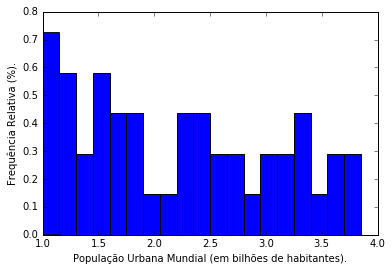

In [155]:
intervalo = np.arange(1, 4, 0.15)
x.plot.hist(bins=intervalo, normed = 1)
plt.ylabel("Frequência Relativa (%).")
plt.xlabel("População Urbana Mundial (em bilhões de habitantes).")

___
### Itens 4 a 6 - Resolução:

##### Item 4.

###### Hipotese:
Assimetria negativa

###### Modelos Escolhidos:
Os modelos escolhidos foram o exponencial e o logarítimico normal, por apresentarem gráficos similares aos do histograma da variável escolhida.

###### Item 5.

alfa = 0.7


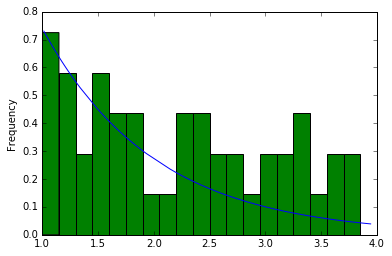

In [156]:
# Modelo exponencial: recebe um único parâmetro 'alfa', cujo valor é a média da distribuição.
alfa = 0.7
a = stats.expon.pdf(x, alfa)
plt.plot(x, a)
x.plot.hist(bins=intervalo, normed = 1)
print("alfa = {0}" .format(alfa))

s = 0.8


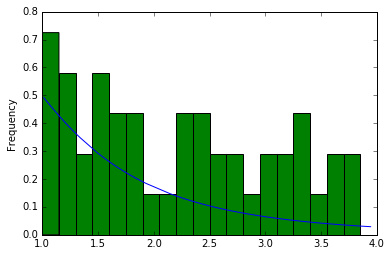

In [157]:
# Modelo logarítimico normal: recebe um único parâmetro 's', que será estimado plotando-se a fdp do modelo.
s = 0.8
a = stats.lognorm.pdf(x, s)
plt.plot(x, a)
x.plot.hist(bins=intervalo, normed = 1)
print("s = {0}" .format(s))

###### Item 6.

In [158]:
teste_exponencial = stats.expon.fit(x)
teste_lognormal = stats.lognorm.fit(x)
print("alfa = {0}" .format(teste_exponencial[1]))
s = teste_lognormal[1]
print("s = {0}".format(s))

alfa = 1.2532762299559468
s = 0.1026296513723692


O parâmetro que será utilizado é o que foi estimado, por gerar um gráfico mais próximo dos valores reais.


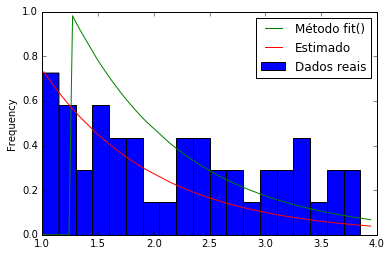

In [159]:
# Comparando os parâmetros estimados com os achados pelo fit():
# Exponencial:
a = stats.expon.pdf(x, 1.2532762299559468)
plt.plot(x, a, '-', color='green', label="Método fit()")
b = stats.expon.pdf(x, 0.7)
plt.plot(x, b, '-', color='red', label="Estimado")
x.plot.hist(bins=intervalo, normed = 1, label="Dados reais")
plt.legend()
print("O parâmetro que será utilizado é o que foi estimado, por gerar um gráfico mais próximo dos valores reais.")

O parâmetro que será utilizado é o que foi estimado, por gerar um gráfico mais próximo dos valores reais.


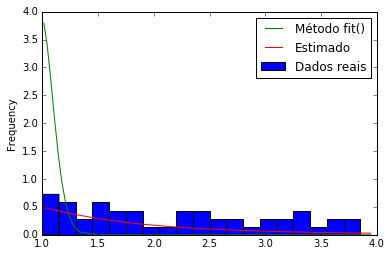

In [160]:
# Logarítimica normal:
a = stats.lognorm.pdf(x, 0.1026296513723692)
plt.plot(x, a, '-', color='green', label="Método fit()")
b = stats.lognorm.pdf(x, 0.8)
plt.plot(x, b, '-', color='red', label="Estimado")
x.plot.hist(bins=intervalo, normed = 1, label="Dados reais")
plt.legend()
print("O parâmetro que será utilizado é o que foi estimado, por gerar um gráfico mais próximo dos valores reais.")

___
### Itens 7 a 9 - Resolução:

###### Item 7.

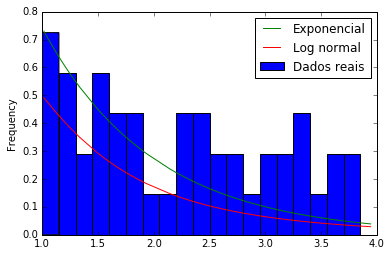

In [161]:
x.plot.hist(intervalo, normed = 1, label="Dados reais")
plt.plot(x, stats.expon.pdf(x,0.7), '-', color='green', label="Exponencial")
plt.plot(x, stats.lognorm.pdf(x, 0.8), '-', color='red', label="Log normal")
plt.legend()

De acordo com o gráfico acima, a função exponencial aparenta ser mais fiel à realidade do que a função logarítimica norma.

###### Item 8.

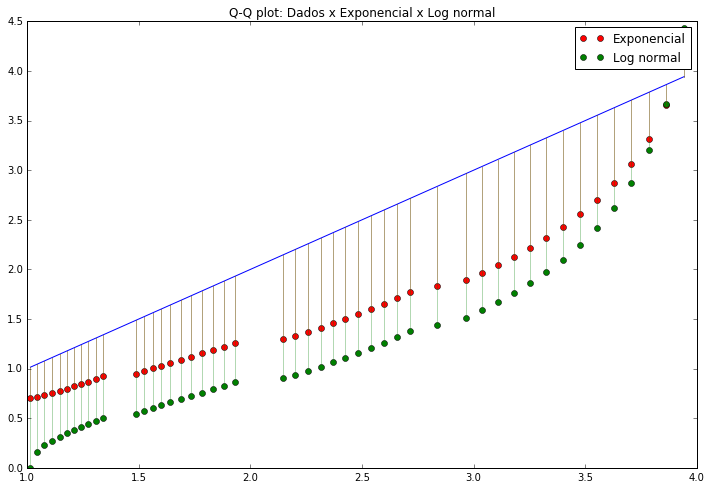

In [162]:
fra = []
for i in range(len(x)):
    acc = (i - 0.5) / len(x)
    if acc < 0:
        acc = 0
    fra.append(acc)
    
fra = pd.Series(data=fra)

q_exp = stats.expon.ppf(fra, 0.7) 
q_lognorm = stats.lognorm.ppf(fra, 0.8)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Log normal")

exp_plot, = plt.plot(x, q_exp, 'o', color="red", label="Exponencial")
lognorm_plot, = plt.plot(x, q_lognorm, 'o', color="green", label = "Log normal")

plt.legend(handles=[exp_plot, lognorm_plot])
plt.plot((min(x), max(x)), (min(x), max(x)), '-')


for i in range(len(x)):
    plt.plot((x[i], x[i]), (q_exp[i], x[i]), '-', color='red', alpha=0.3  )
    plt.plot((x[i], x[i]), (q_lognorm[i], x[i]), '-', color='green', alpha=0.3  )



###### Item 9.

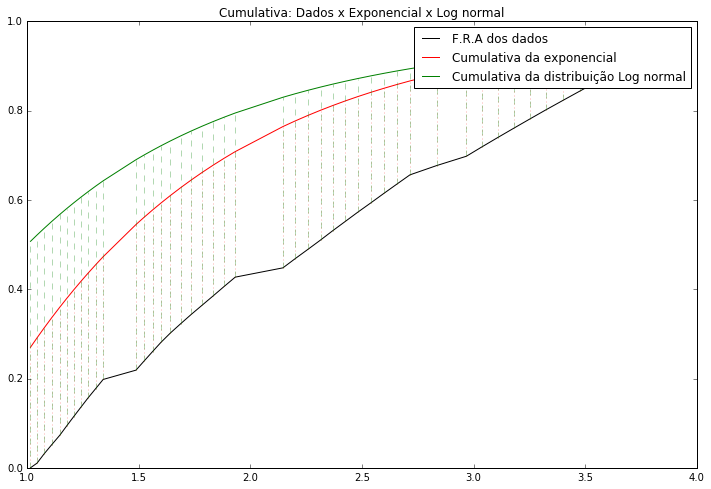

In [163]:
cdf_exponencial = stats.expon.cdf(x, 0.7)
cdf_lognorm = stats.lognorm.cdf(x, 0.8)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Log normal")

dados_fra_plot, = plt.plot(x, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(x, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_lognorm_plot, = plt.plot(x, cdf_lognorm, '-', color='green', label = "Cumulativa da distribuição Log normal")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_lognorm_plot])


for i in range(len(x)):
    plt.plot((x[i], x[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    
    plt.plot((x[i], x[i]), (fra[i], cdf_lognorm[i]), '--', color="green", alpha=0.3)
    

Nesse gráfico, as funções demonstram sinais de insuficiência para análisar a variável escolhida: a densidade acumulada pelas funções exponencial e logarítimica normal são maiores do que a dos valores reais.

___
### Itens 10 e 11 - Resolução:

###### Item 10.

###### Erro quadrático nas CDFs

In [166]:
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)
erro_quad_cdf_lognorm = sum((fra - cdf_lognorm)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Lognorm versus F.R.A", erro_quad_cdf_lognorm)

Erro quadrático da CDF da Exponencial versus F.R.A 2.92536515299
Erro quadrático da CDF da Lognorm versus F.R.A 5.89674192476


###### Diferenças absolutas

In [168]:
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_lognorm = sum( abs(fra - cdf_lognorm))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da log normal versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_lognorm))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 10.98964606382553 
Erro da soma do módulo das diferenças da log normal versus F.R.A: 15.079461908984005


###### Erro quadrático

In [173]:
erro_quadratico_exponencial = sum((x - q_exp)**2)
erro_quadratico_lognorm = sum((x - q_lognorm)**2)

print("Erro quadrático da exponencial :{:4.3f}\n".format(erro_quadratico_exponencial))
print("Erro quadrático da log normal :{:4.3f}\n".format(erro_quadratico_lognorm))

Erro quadrático da exponencial :26.167

Erro quadrático da log normal :58.698



###### Erro quadrático médio

In [172]:
eqm_exp = erro_quadratico_exponencial/len(x)
eqm_lognorm = erro_quadratico_lognorm/len(x)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da log normal :", eqm_lognorm)

Erro quadratico médio da exponencial : 0.545138295707
Erro quadratico médio da log normal : 1.22287152787


###### Soma de diferenças

In [174]:
soma_diferenças_exponencial = sum(abs(x - q_exp))
soma_diferenças_lognorm = sum(abs(x - q_lognorm))

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da log normal :", soma_diferenças_lognorm)


Soma de diferenças da exponencial : 33.1214931358
Soma de diferenças da log normal : 51.4546508275


###### Item 11.

|           |  Erro quadrático | Erro quadrático médio | Soma de diferenças| Erro quadrático na CDF versus F.R.A |
|-----------|-------------|------------------|-------------------|
| Exponencial     | 26.167 | 0.545138295707 | 33.1214931358 | 2.92536515299 |
| Log Normal| 58.698 | 1.22287152787 | 51.4546508275 | 5.89674192476 |

Conclusão: em todas as análises o modelo exponencial supera o log normal e é, portanto, o mais apropriado a ser utilizado dentre as duas opções.